# Implementation of ANN using Keras

# checking if we can predict the handwritten letter or not 

In [108]:
# Importing Libraries
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import seaborn as sns
import os 

In [109]:
# Checking version of Tensorflow and Keras
print(f"Tensorflow Verion {tf.__version__}")
print(f"Keras Version {tf.keras.__version__}")

Tensorflow Verion 2.12.0
Keras Version 2.12.0


In [110]:
os.getcwd()

'd:\\data science\\Deep Learning and Neural Network'

## GPU/ CPU Check

In [111]:
tf.config.list_physical_devices("GPU")

[]

In [112]:
tf.config.list_physical_devices("CPU")

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [113]:
import tensorflow as tf

print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))


Num GPUs Available:  0


In [114]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)


In [115]:
check_list = ['GPU', 'CPU']
for device in check_list:

    out = tf.config.list_physical_devices (device)
    if len(out) > 0:
        print(f"{device} is available")
        print(f"Details >> {out}")
    else:
        print(f"{device} isn't available")

GPU isn't available
CPU is available
Details >> [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


## Creating a simple Classifier using keras on MNIST data 

In [116]:
mnist = tf.keras.datasets.mnist
mnist

<module 'keras.api._v2.keras.datasets.mnist' from 'c:\\Users\\PC\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages\\keras\\api\\_v2\\keras\\datasets\\mnist\\__init__.py'>

In [117]:
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

In [118]:
X_train_full.shape

(60000, 28, 28)

In [119]:
X_test.shape

(10000, 28, 28)

In [120]:
X_train_full[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [121]:
print(f"data type of X_train_full: {X_train_full.dtype}, \n shape of X_train_full: {X_train_full.shape}")

data type of X_train_full: uint8, 
 shape of X_train_full: (60000, 28, 28)


In [122]:
# Creating a validation  data set from the full training data
# Scale the data betweedn 0 to 1 by dividing it by 255, as it's an unsigned data between 0- 255 range

X_valid, X_train = X_train_full[:5000] /255., X_train_full[5000:]/ 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]


# scaling the test data as well 
X_test = X_test / 255. 

In [123]:
# Train = 55000
# Test = 10000
# Validation = 5000

In [124]:
len(X_train_full[5000:])

55000

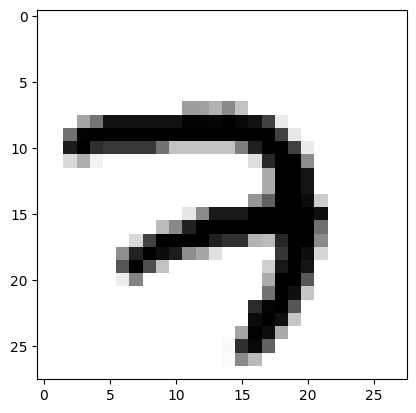

In [125]:
# Plotting  the first image of train data 
plt.imshow(X_train[0], cmap="binary")
plt.show()

<AxesSubplot: >

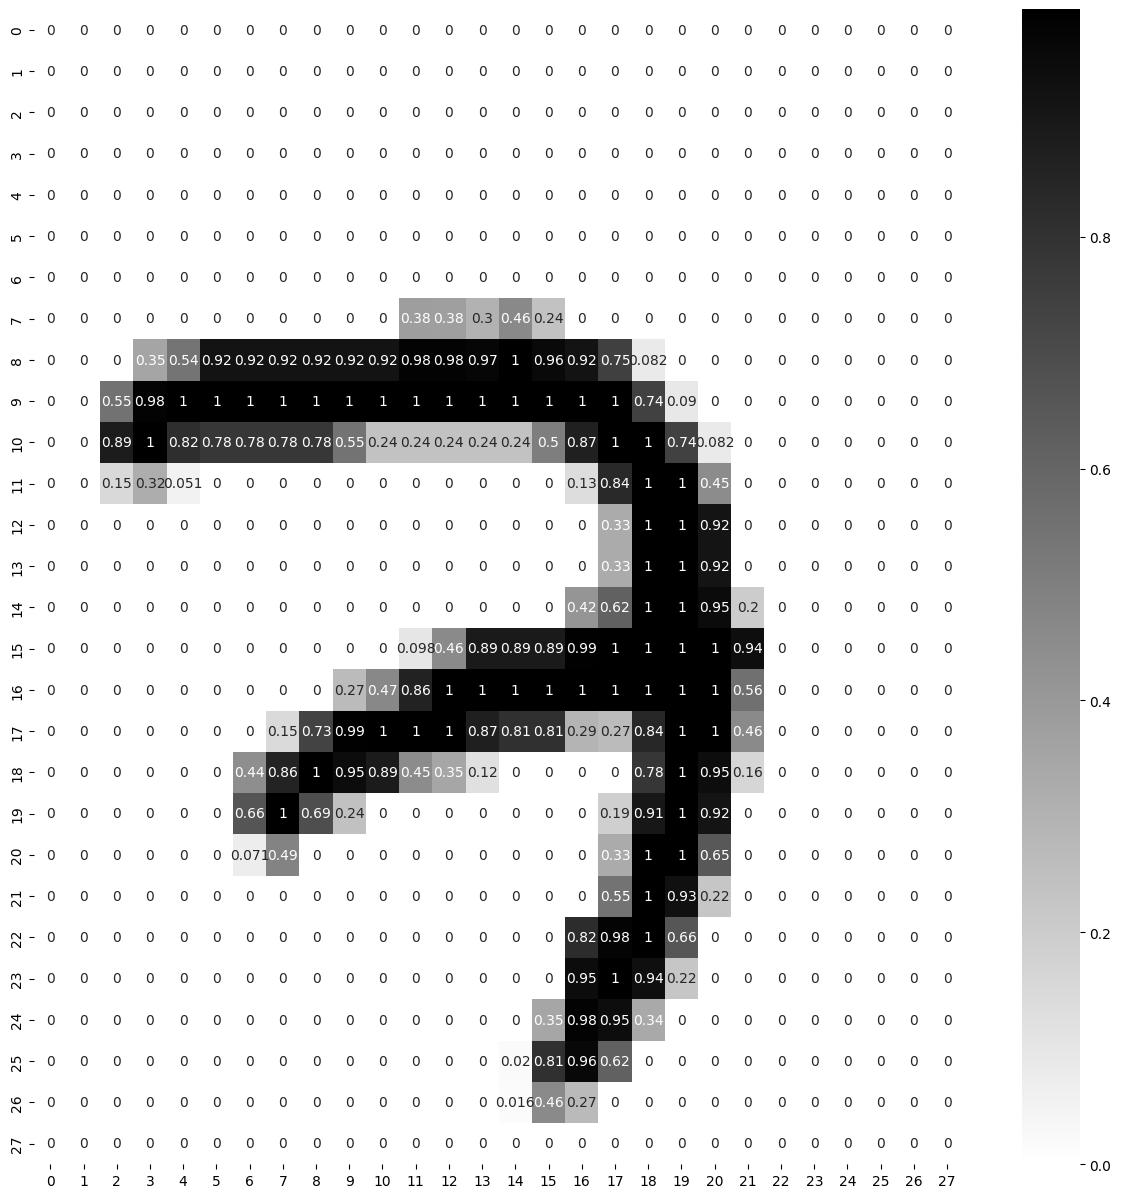

In [126]:
# showing the same image in heatmap 
plt.figure(figsize=(15, 15))
sns.heatmap(X_train[0], annot=True, cmap = "binary")

In [127]:
# Trainable Parameters 

In [128]:
# Creating layers of ANN
Layers = [tf.keras.layers.Flatten(input_shape = [28, 28], name = "inputLayer"),
          tf.keras.layers.Dense(300, activation="relu", name = "hiddenLayer1"),
          tf.keras.layers.Dense(100, activation="relu", name = "hiddenLayer2"),
          tf.keras.layers.Dense(10, activation="softmax", name = "outputLayer"),
          ]

model_clf = tf.keras.models.Sequential(Layers)

In [129]:
model_clf.layers

In [130]:
model_clf.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenLayer1 (Dense)        (None, 300)               235500    
                                                                 
 hiddenLayer2 (Dense)        (None, 100)               30100     
                                                                 
 outputLayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [131]:
## 266610 parameters were used 

In [132]:
hidden1 = model_clf.layers[1]
hidden1.name

'hiddenLayer1'

In [133]:
hidden1.get_weights()[0].shape

(784, 300)

In [134]:
weights, biases = hidden1.get_weights()

In [135]:
weights.shape

(784, 300)

In [136]:
hidden1.get_weights()

[array([[-0.03352368, -0.05628727, -0.02240321, ...,  0.03476267,
         -0.06323744, -0.01377548],
        [-0.02378233,  0.04282203,  0.03032614, ...,  0.01237912,
          0.02105933,  0.03286348],
        [ 0.00197479,  0.01404206,  0.04468886, ...,  0.0025884 ,
          0.02238458, -0.07334406],
        ...,
        [-0.0421011 ,  0.01745717, -0.02164204, ...,  0.01478216,
          0.04827745, -0.00060202],
        [-0.06681076,  0.07383747, -0.01696851, ...,  0.00082391,
          0.04959533, -0.06299217],
        [ 0.01677304,  0.03246848, -0.02329163, ...,  0.0425109 ,
         -0.05862386,  0.06703746]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [137]:
# for biases 
print("shape \n", biases.shape)
biases 

shape 
 (300,)


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [138]:
# Loss function 
LOSS_FUNCTION = "sparse_categorical_crossentropy"
OPTIMIZER = "SGD"
METRICS = ["accuracy"]

model_clf.compile(loss = LOSS_FUNCTION, 
                  optimizer=OPTIMIZER,
                  metrics=METRICS)

In [139]:
# training the model 
EPOCHS = 30
VALIDATION_SET = (X_valid, y_valid)

history = model_clf.fit(X_train, y_train, epochs=EPOCHS, validation_data=VALIDATION_SET, batch_size=32)

Epoch 1/30


1719/1719 [==============================] - 9s 5ms/step - loss: 0.6199 - accuracy: 0.8407 - val_loss: 0.3068 - val_accuracy: 0.9146
Epoch 2/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2882 - accuracy: 0.9177 - val_loss: 0.2419 - val_accuracy: 0.9308
Epoch 3/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2336 - accuracy: 0.9338 - val_loss: 0.1986 - val_accuracy: 0.9426
Epoch 4/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.1990 - accuracy: 0.9427 - val_loss: 0.1728 - val_accuracy: 0.9532
Epoch 5/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.1738 - accuracy: 0.9506 - val_loss: 0.1569 - val_accuracy: 0.9570
Epoch 6/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.1539 - accuracy: 0.9559 - val_loss: 0.1417 - val_accuracy: 0.9600
Epoch 7/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.1384 - accuracy: 0.9601 - val_loss: 0.1358 - val_accuracy: 0.9628
Epo

In [140]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [141]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.619893,0.840745,0.306802,0.9146
1,0.288231,0.917727,0.241875,0.9308
2,0.233554,0.933836,0.198603,0.9426
3,0.199004,0.942727,0.172806,0.9532
4,0.173777,0.950600,0.156878,0.9570
5,0.153908,0.955909,0.141668,0.9600
6,0.138404,0.960127,0.135773,0.9628
7,0.125188,0.964364,0.122011,0.9666
8,0.113868,0.967673,0.113675,0.9674
9,0.104266,0.970600,0.106540,0.9704


<AxesSubplot: >

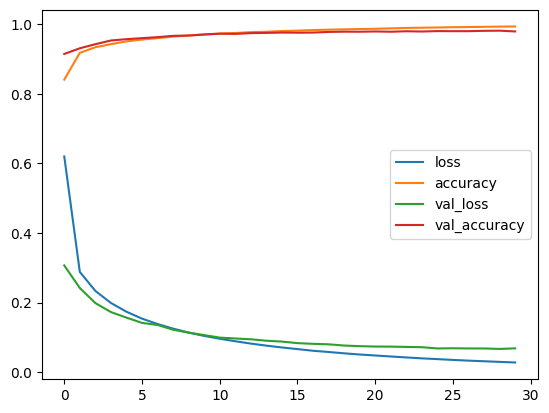

In [142]:
#plotting 
pd.DataFrame(history.history).plot()

In [143]:
# evalauating the model 
model_clf.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0704 - accuracy: 0.9780


[0.0703728124499321, 0.9779999852180481]

Sample check of test data

In [144]:
x_new = X_test[:3]

In [145]:
actual = y_test[:3]
actual

array([7, 2, 1], dtype=uint8)

<AxesSubplot: >

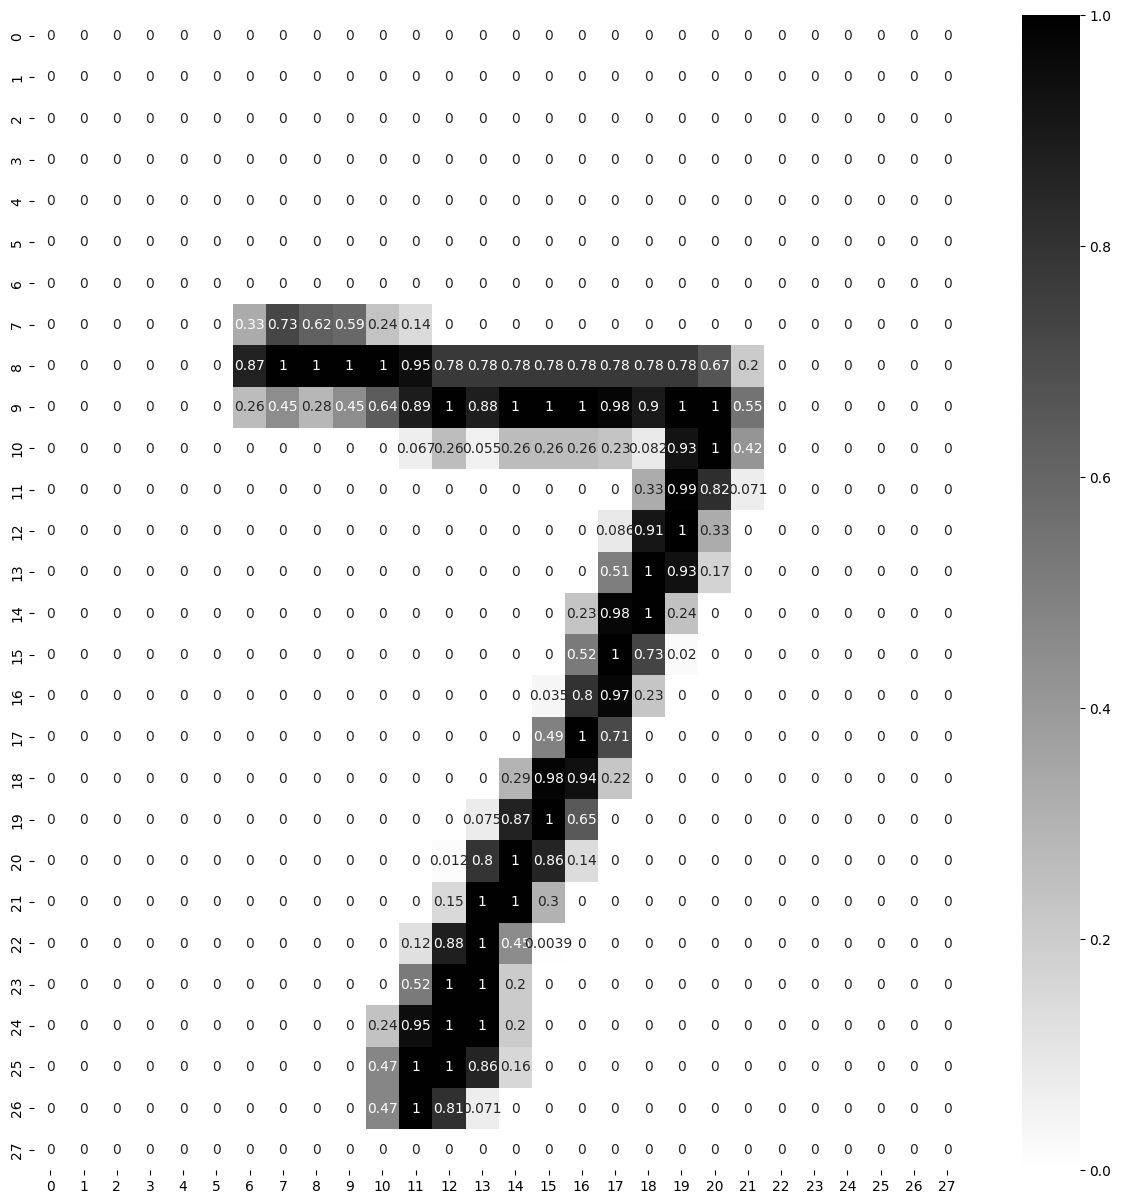

In [146]:
plt.figure(figsize=(15, 15))
sns.heatmap(X_test[0], annot= True, cmap="binary")

In [147]:
# Checking if model can predict or not 
y_prob = model_clf.predict(x_new)
y_prob.round(3)

1/1 [==============================] - 0s 107ms/step


array([[0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 1.   , 0.   ,
        0.   ],
       [0.   , 0.   , 0.999, 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 0.998, 0.   , 0.   , 0.   , 0.   , 0.   , 0.001, 0.001,
        0.   ]], dtype=float32)

In [148]:
y_prob

array([[3.7278276e-06, 7.0601274e-08, 3.8584891e-05, 8.4024759e-05,
        1.2481419e-08, 1.0842023e-07, 1.7264616e-10, 9.9986398e-01,
        2.0628704e-06, 7.3540823e-06],
       [3.2149993e-07, 4.9263594e-04, 9.9900502e-01, 4.9716234e-04,
        5.2393770e-11, 1.6831042e-07, 3.3078771e-07, 4.7346992e-12,
        4.3223013e-06, 3.2218325e-12],
       [1.4507250e-06, 9.9835902e-01, 1.4674016e-04, 7.7461998e-05,
        1.6160455e-04, 1.8838746e-05, 4.9122602e-05, 5.4246688e-04,
        6.3912058e-04, 4.1781932e-06]], dtype=float32)

In [149]:
y_pred = np.argmax(y_prob, axis=-1)

In [150]:
y_pred

array([7, 2, 1], dtype=int64)

In [151]:
actual

array([7, 2, 1], dtype=uint8)

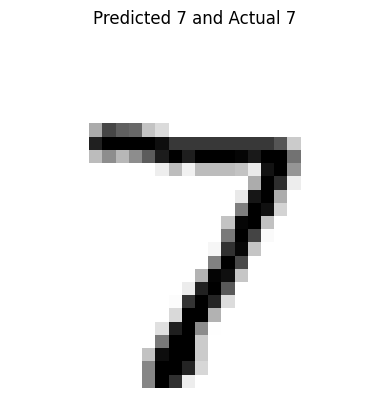

-------------------------------------------


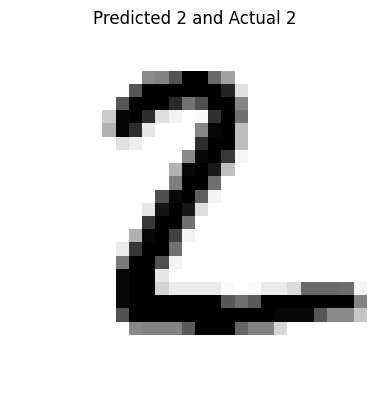

-------------------------------------------


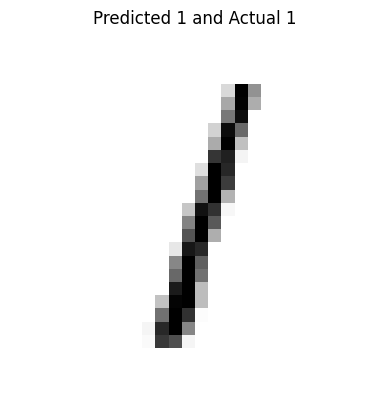

-------------------------------------------


In [152]:
# plotting the actual and predicted one 
for data, pred, actual_data in zip(x_new, y_pred, actual):
    plt.imshow(data, cmap = "binary")
    plt.title(f"Predicted {pred} and Actual {actual_data}")
    plt.axis("off")
    plt.show()
    print("-------------------------------------------")